Find the top 2 years for each species when they had the lowest populations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

url = 'http://scipy-lectures.org/_downloads/populations.txt'

a = np.loadtxt(url, delimiter='\t', skiprows = 1, usecols=None, unpack=True, dtype = int)

print('the top 2 years for hare are',1900+np.argsort(a[1])[0], 'and', 1900+np.argsort(a[1])[1])
print('the top 2 years for lynx are',1900+np.argsort(a[2])[0], 'and', 1900+np.argsort(a[2])[1])
print('the top 2 years for carrots are',1900+np.argsort(a[3])[0], 'and', 1900+np.argsort(a[3])[1])

the top 2 years for hare are 1917 and 1916
the top 2 years for lynx are 1900 and 1901
the top 2 years for carrots are 1916 and 1903


Show population of hares vs carrots and hares vs lynxes.

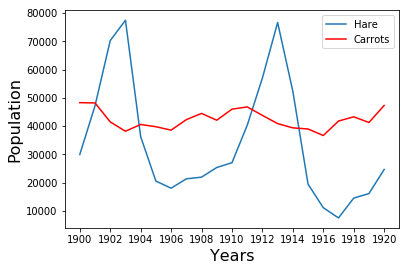

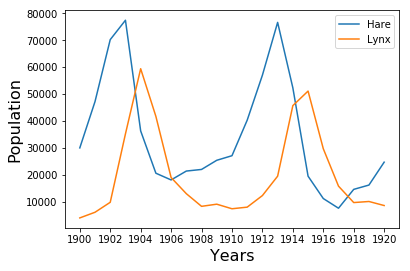

In [3]:
X = a[0]
plt.plot(X, a[1][X-1900], label='Hare')
plt.plot(X, a[3][X-1900], label='Carrots', c='r')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

plt.plot(X, a[1][X-1900], label='Hare')
plt.plot(X, a[2][X-1900], label='Lynx')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. 
Compare an estimated value with the true value and print a ratio of the error to the true value.

In [4]:
estimated_value = 0

if (a[2, 19] - a[2,18] < 0):
    if (a[2,19] < 20000):
        estimated_value = a[1,19] + 10000
    else:
        estimated_value = a[1,19] - 10000
else:
    if (a[2,19] < 35000):
        estimated_value = a[1,19] + 10000
    else:
        estimated_value = a[1,19] - 10000

print('estimated value is', estimated_value)
print('true value is', a[1,20])
error = abs(estimated_value - a[1,20])
print('ratio of the error to the true value', error/a[1,20])

estimated value is 26200
true value is 24700
ratio of the error to the true value 0.06072874493927125


Find which years any of the populations is above 50000. 
Show time periods where populations are above 50000 in the plot of populations.

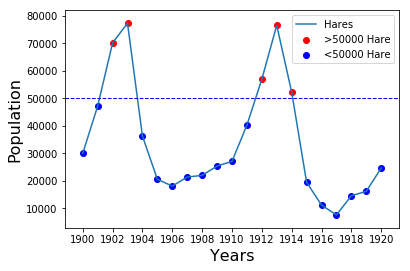

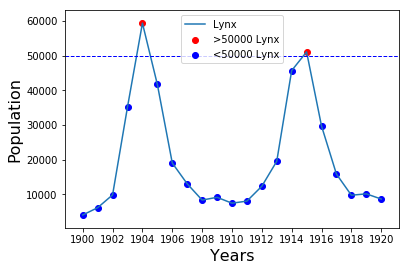

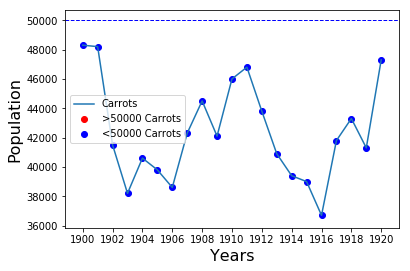

In [5]:
mask = a[1][X-1900] > 50000 
plt.plot(a[0], a[1], label="Hares")
plt.scatter(X[mask==True], a[1][mask==True], label='>50000 Hare', c='r')
plt.scatter(X[mask!=True], a[1][mask!=True], label='<50000 Hare', c='b')
plt.axhline(50000, color='b', linestyle='dashed', linewidth=1)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

mask = a[2][X-1900] > 50000 
plt.plot(a[0], a[2], label="Lynx")
plt.scatter(X[mask==True], a[2][mask==True], label='>50000 Lynx', c='r')
plt.scatter(X[mask!=True], a[2][mask!=True], label='<50000 Lynx', c='b')
plt.axhline(50000, color='b', linestyle='dashed', linewidth=1)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

mask = a[3][X-1900] > 50000 
plt.plot(a[0], a[3], label="Carrots")
plt.scatter(X[mask==True], a[3][mask==True], label='>50000 Carrots', c='r')
plt.scatter(X[mask!=True], a[3][mask!=True], label='<50000 Carrots', c='b')
plt.axhline(50000, color='b', linestyle='dashed', linewidth=1)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. 
Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


([<matplotlib.patches.Wedge at 0x16bbb0a6390>,
 [Text(-0.685839,0.860015,'Hare'), Text(0.685839,-0.860015,'Lynx')])

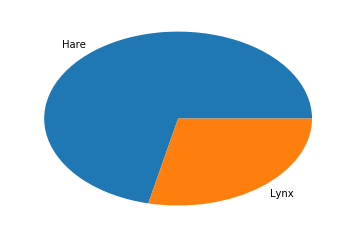

In [6]:
check1 = a[1] > a[2]
check2 = np.where(check1 != False, 'H', 'L')
print(check2)
check3 = np.where(check2 != 'L', 0, 1)
check4 = np.bincount(check3)
name = ['Hare', 'Lynx', 'Carrots']
plt.pie(check4, labels=name[:2])

Plot the populations for the years in the period. Add legend and axis labels to the plot.

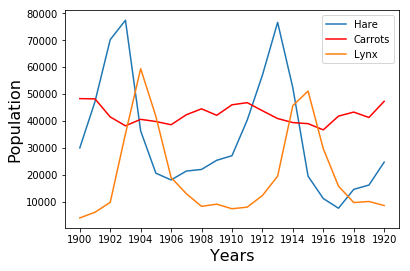

In [7]:
plt.plot(X, a[1][X-1900], label='Hare')
plt.plot(X, a[3][X-1900], label='Carrots', c='r')
plt.plot(X, a[2][X-1900], label='Lynx')
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

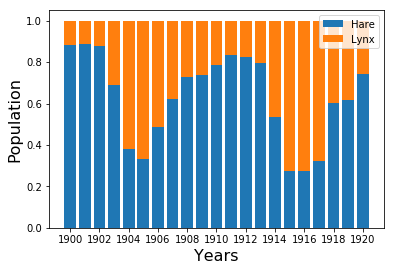

In [8]:
plt.bar(X,a[1]/(a[1]+a[2]), label='Hare')
plt.bar(X,a[2]/(a[1]+a[2]), label='Lynx', bottom = a[1]/(a[1]+a[2]))
plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.xticks(X[::2])
plt.legend()
plt.show()

Find the mean and std of the populations of each species. 
Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

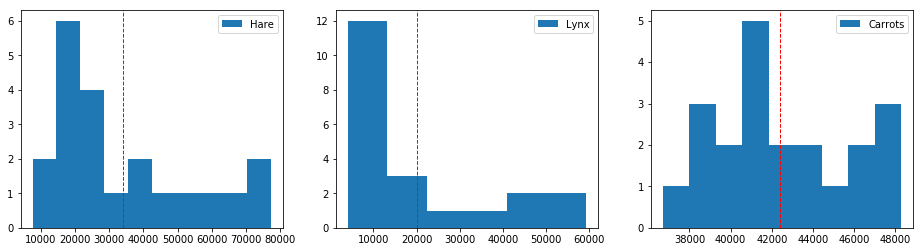

In [9]:
fix, ax = plt.subplots(1, 3, figsize=(16,4))

ax[0].hist(a[1], bins=10, label=name[0])
ax[0].axvline(a[1].mean(), color='r', linestyle='dashed', linewidth=1)
ax[0].legend()

ax[1].hist(a[2], bins=6, label=name[1])
ax[1].axvline(a[2].mean(), color='r', linestyle='dashed', linewidth=1)
ax[1].legend()

ax[2].hist(a[3], bins=9, label=name[2])
ax[2].axvline(a[3].mean(), color='r', linestyle='dashed', linewidth=1)
ax[2].legend()

Find which year each species had the largest population. Mark these years in the plot of populations.

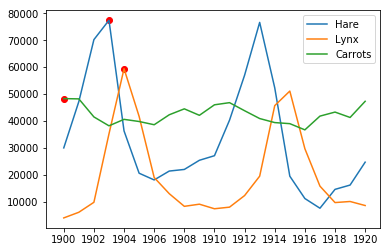

In [10]:
from matplotlib import rcParams
max_idx = np.argmax(a[1:], axis=1)

plt.scatter(a[0][max_idx[0]], a[1][max_idx[0]], c='r', marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
plt.plot(a[0], a[1], '-', label=name[0])
plt.scatter(a[0][max_idx[1]], a[2][max_idx[1]], c='r', marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
plt.plot(a[0], a[2], '-', label=name[1])
plt.scatter(a[0][max_idx[2]], a[3][max_idx[2]], c='r', marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
plt.plot(a[0], a[3], '-', label=name[2])

plt.xticks(X[::2])
plt.legend()

Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

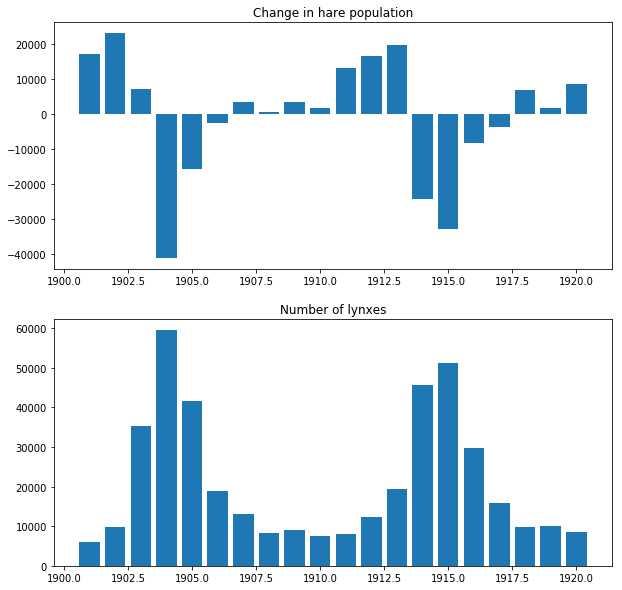

Correlation is 0.0718920607353557


In [11]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
plt.bar(a[0,1:], a[1,1:] - a[1,:-1])
plt.title("Change in hare population")

plt.subplot(2,1,2)
plt.bar(a[0,1:], a[2,1:])
plt.title("Number of lynxes")

plt.show()

print("Correlation is", np.corrcoef(a[1,:],a[2,:])[0,1])

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784')

In [23]:
from sklearn.decomposition import PCA

In [27]:
a = []

for i in np.arange(50, 401, 50):
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_data.data.astype(float)) 
    a.append(pca.explained_variance_ratio_.sum())

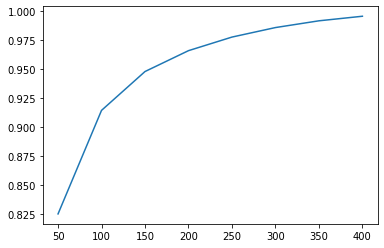

In [30]:
plt.plot(np.arange(50, 401, 50), a)

In [32]:
mnist_digits = mnist_data.data.astype(float)

In [35]:
pca = PCA(n_components = 60)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.8532480551844189

In [36]:
pca = PCA(n_components = 90)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.9037767367387285

In [38]:
pca = PCA(n_components = 155)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.9504242993225445

In [39]:
pca = PCA(n_components = 340)
X_transformed = pca.fit_transform(mnist_digits)
X_restored = pca.inverse_transform(X_transformed[0])
pca.explained_variance_ratio_.sum()

0.990850666821386

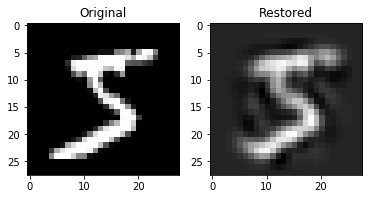

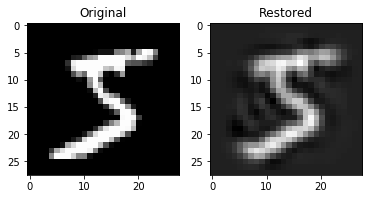

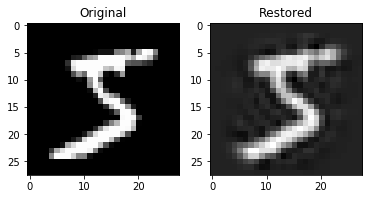

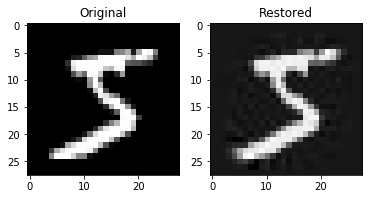

In [40]:
a = [60, 90, 155, 340]

for i in a:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[0])
    
    fix, ax = plt.subplots(1, 2)
    ax[0].imshow(mnist_digits[0].reshape(28, 28), cmap='gray')
    ax[1].imshow(X_restored.reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[1].set_title('Restored')
    plt.show()

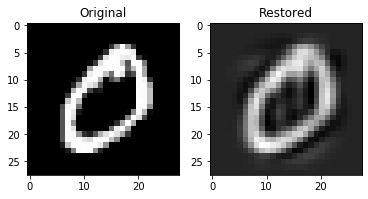

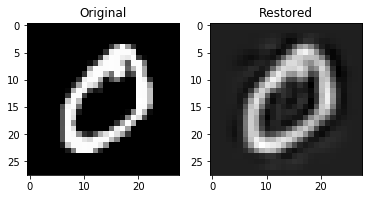

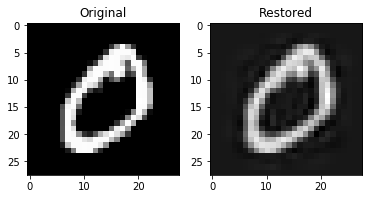

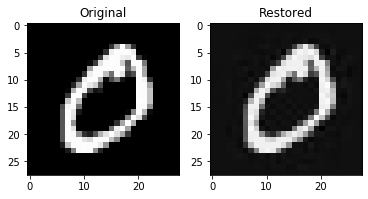

In [42]:
a = [60, 90, 155, 340]

for i in a:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[1])
    
    fix, ax = plt.subplots(1, 2)
    ax[0].imshow(mnist_digits[1].reshape(28, 28), cmap='gray')
    ax[1].imshow(X_restored.reshape(28, 28), cmap='gray')
    ax[0].set_title('Original')
    ax[1].set_title('Restored')
    plt.show()